In [1]:
import os 
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import scgen
import seaborn as sns
from scipy import stats
import matplotlib
sc.set_figure_params(dpi_save=300)

/Users/Future/Library/Python/3.6/lib/python/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
path_to_save = "../results/Figures/Supplemental Figure 12/"
os.makedirs(path_to_save, exist_ok=True)
sc.settings.figdir = path_to_save

In [3]:
pbmc = sc.read("../data/train_pbmc.h5ad")
cd4t = pbmc[pbmc.obs["cell_type"] == "CD4T"]
pbmc

AnnData object with n_obs × n_vars = 16893 × 6998 
    obs: 'condition', 'n_counts', 'n_genes', 'mt_frac', 'cell_type'
    var: 'gene_symbol', 'n_cells'
    uns: 'cell_type_colors', 'condition_colors', 'neighbors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [4]:
pbmc.obs.groupby(['cell_type', 'condition']).size()

cell_type    condition 
CD4T         control       2437
             stimulated    3127
CD14+Mono    control       1946
             stimulated     615
B            control        818
             stimulated     993
CD8T         control        574
             stimulated     541
NK           control        517
             stimulated     646
FCGR3A+Mono  control       1100
             stimulated    2501
Dendritic    control        615
             stimulated     463
dtype: int64

In [5]:
sc.tl.rank_genes_groups(cd4t, groupby="condition", n_genes=100, method="wilcoxon")
diff_genes = cd4t.uns["rank_genes_groups"]["names"]["stimulated"]

In [6]:
%%bash
python ../code/vec_arith_pca.py

data has been loaded!
data has been loaded!
Data has been fitted!
['NK', 'Dendritic', 'CD4T', 'B', 'FCGR3A+Mono', 'CD14+Mono', 'CD8T']
NK	NK
Dendritic	Dendritic
CD4T	CD4T
B	B
FCGR3A+Mono	FCGR3A+Mono
CD14+Mono	CD14+Mono
CD8T	CD8T


Using TensorFlow backend.
... storing 'condition' as categorical
... storing 'condition' as categorical
... storing 'cell_type' as categorical
... storing 'condition' as categorical


In [6]:
pca_cd4t_biased = sc.read("../data/reconstructed/PCAVecArithm/PCA_CD4T_biased.h5ad")
pca_cd4t_biased

AnnData object with n_obs × n_vars = 8001 × 6998 
    obs: 'condition'

In [7]:
pca_cd4t_biased.obs.groupby(['condition']).size()

condition
ctrl         2437
pred_stim    2437
real_stim    3127
dtype: int64

In [8]:
pca_cd4t_unbiased = sc.read("../data/reconstructed/PCAVecArithm/PCA_CD4T.h5ad")
pca_cd4t_unbiased

AnnData object with n_obs × n_vars = 8001 × 6998 
    obs: 'condition'

In [9]:
pca_cd4t_unbiased.obs.groupby(['condition']).size()

condition
ctrl         2437
pred_stim    2437
real_stim    3127
dtype: int64

0.7261694679349584
0.8248950992922749


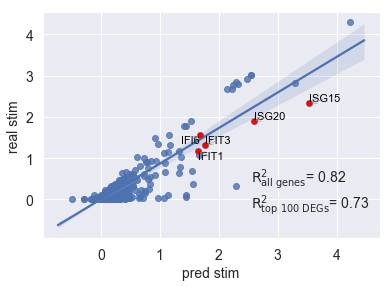

In [10]:
scgen.plotting.reg_mean_plot(pca_cd4t_biased,
                             labels={"x": "pred stim", "y": "real stim"},
                             condition_key="condition",
                             axis_keys={"x": "pred_stim", "y": "real_stim"},
                             path_to_save=os.path.join(path_to_save, "SupplFig12a_PCA_reg_mean.pdf"),
                             title="",
                             fontsize=14,
                             x_coeff=0.4,
                             y_coeff=0.9,
                             gene_list=diff_genes[:5],
                             legend=False,
                             show=True,
                             top_100_genes=diff_genes)

0.810540741835654
0.8968271875331962


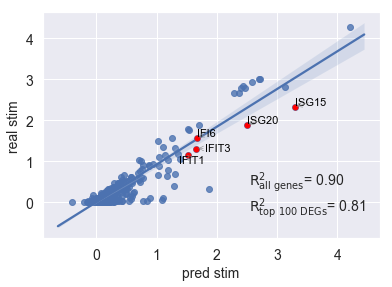

In [11]:
scgen.plotting.reg_mean_plot(pca_cd4t_unbiased,
                             labels={"x": "pred stim", "y": "real stim"},
                             condition_key="condition",
                             axis_keys={"x": "pred_stim", "y": "real_stim"},
                             path_to_save=os.path.join(path_to_save, "SupplFig12b_PCA_reg_mean.pdf"),
                             title="",
                             fontsize=14,
                             x_coeff=0.4,
                             y_coeff=0.9,
                             gene_list=diff_genes[:5],
                             legend=False,
                             show=True,
                             top_100_genes=diff_genes)

         Falling back to preprocessing with `sc.pp.pca` and default params.
saving figure to file ../results/Figures/Supplemental Figure 12/umapVec_Arith_PCA_biased.png


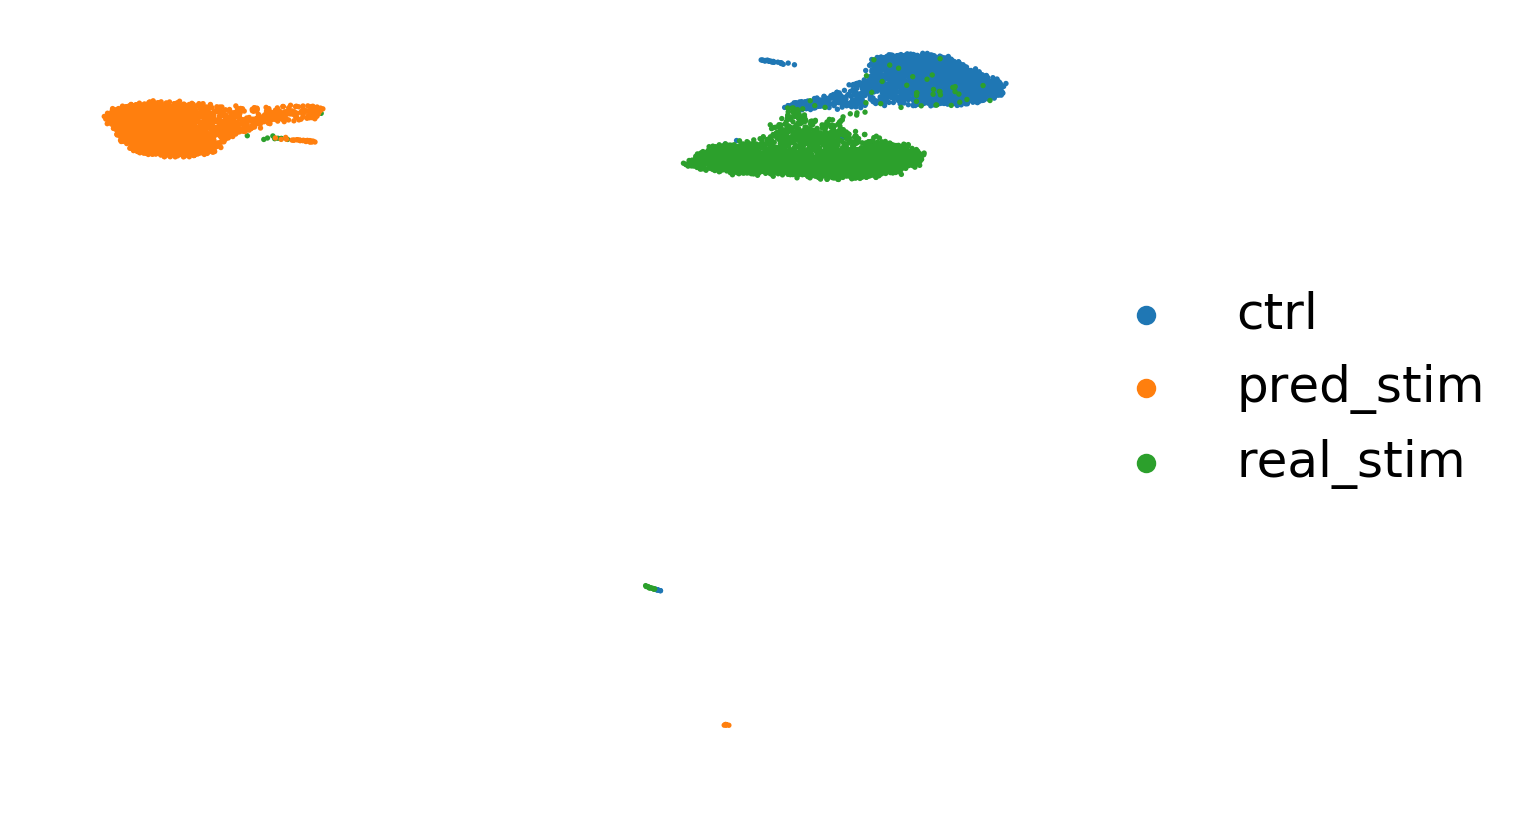

In [10]:
plt.style.use('default')
sc.pp.neighbors(pca_cd4t_biased)
sc.tl.umap(pca_cd4t_biased)
sc.pl.umap(pca_cd4t_biased, color=["condition"], frameon=False, palette=matplotlib.rcParams["axes.prop_cycle"],
           save="Vec_Arith_PCA_biased.png", show=True,
           legend_fontsize=18, title="")

         Falling back to preprocessing with `sc.pp.pca` and default params.
saving figure to file ../results/Figures/Supplemental Figure 12/umapVec_Arith_PCA_unbiased.png


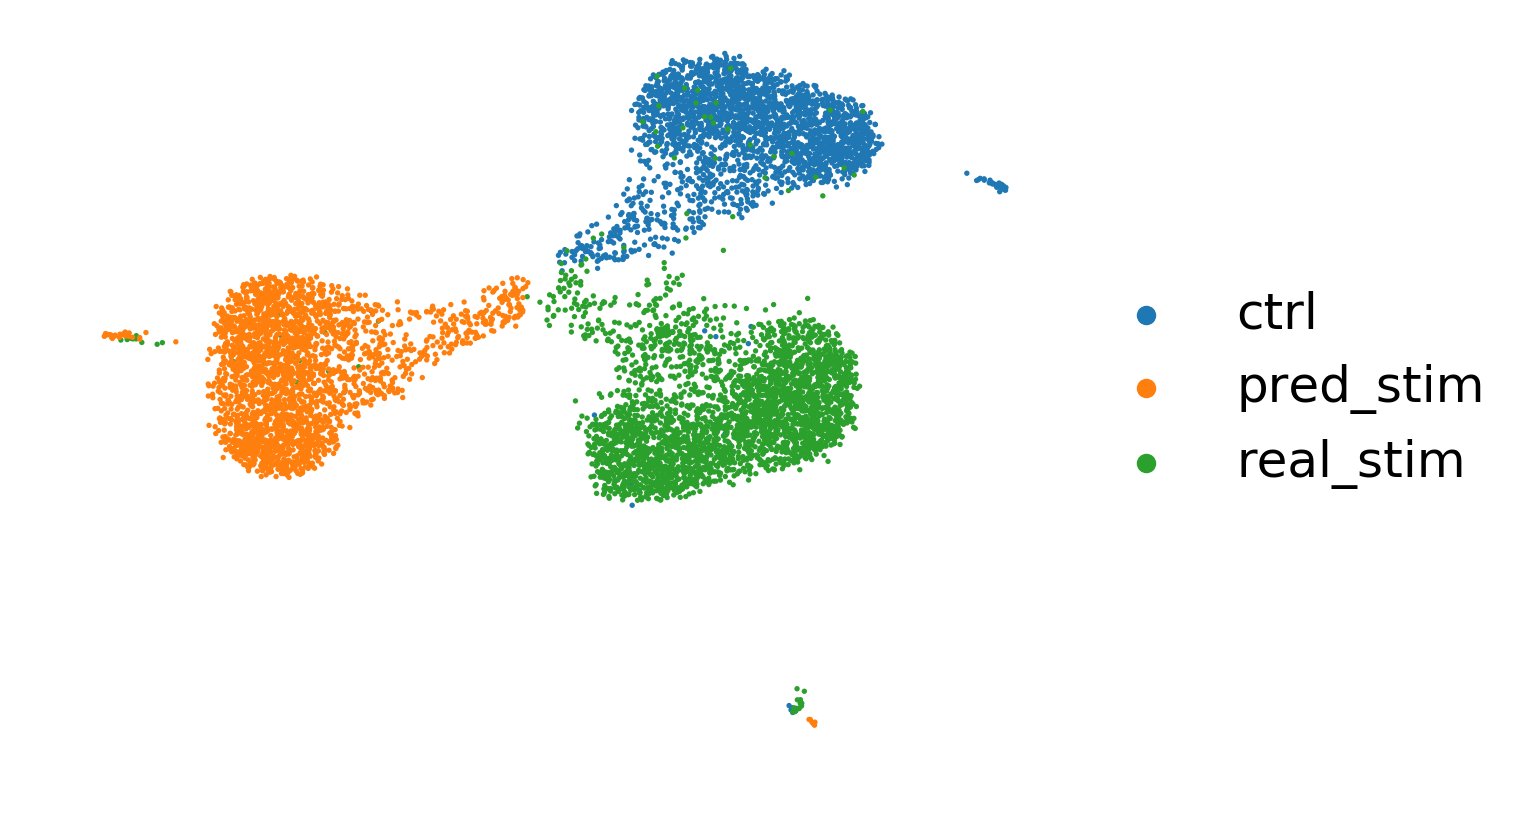

In [11]:
sc.pp.neighbors(pca_cd4t_unbiased)
sc.tl.umap(pca_cd4t_unbiased)
sc.pl.umap(pca_cd4t_unbiased, color=["condition"], frameon=False, palette=matplotlib.rcParams["axes.prop_cycle"],
           save="Vec_Arith_PCA_unbiased.png", show=True,
           legend_fontsize=18, title="")